<h1 dir="rtl" align="left">
Social Networks HW3 - University of Tehran - Fall 1404
</h1>


<div>
Name: Amir Hoseein Farazmand
<br/>
Student number : 810104221
</div>

# **Imports & Loading Data**

In [1]:
from Balance import solve_sign_prediction
from Balance import solve_balance_test
from Balance import solve_clusterability
from Balance import solve_line_index
from Balance import solve_transitivity
import matplotlib.pyplot as plt
import networkx as nx
import os

file_path_q1 = 'Networks/Part_A/1/balanced_graph.csv'

base_path_q2 = 'Networks/Part_A/2'
network_files = [f'network_{char}.csv' for char in 'abcdefgh']

base_path_q3 = 'Networks/Part_A/3'
network_files = [f'network_{char}.csv' for char in 'abcde'] 

file_path_q4 = 'Networks/Part_A/4/network_line_index.csv'

file_path_q5 = 'Networks/Part_A/5/network_transitivity.csv'

# **Sign prediction**

In [2]:
full_df, predicted_only_df = solve_sign_prediction(file_path_q1)

print("Prediction completed.")
print(f"Number of unknown edges predicted: {len(predicted_only_df)}\n")
    
print("All Predicted Edges:")
print(predicted_only_df.to_string(index=False))

Prediction completed.
Number of unknown edges predicted: 89

All Predicted Edges:
 u  v  sign
 0  9     1
 0 24    -1
 0 33    -1
 1 15     1
 1 40    -1
 2 15    -1
 2 16     1
 2 19     1
 2 35    -1
 2 40     1
 2 43    -1
 2 46     1
 3 10     1
 3 13     1
 3 14     1
 3 22    -1
 3 34    -1
 3 42     1
 3 45     1
 3 46    -1
 4  8    -1
 4 24    -1
 4 27    -1
 5 16    -1
 5 22    -1
 5 34    -1
 6 16    -1
 7 49     1
 8 14    -1
 8 24     1
 8 36     1
 8 37    -1
11 13     1
13 16    -1
13 48     1
13 49     1
14 20     1
14 27    -1
15 16    -1
15 20     1
15 31     1
15 43     1
16 26    -1
16 47    -1
17 25     1
17 32    -1
18 32     1
18 43    -1
19 43    -1
19 48    -1
20 45     1
22 26    -1
23 25    -1
23 32     1
24 25    -1
24 33     1
24 36     1
25 34    -1
26 36    -1
27 41     1
27 43    -1
28 31     1
29 32    -1
29 43     1
30 42    -1
30 47    -1
32 43    -1
33 38     1
34 36     1
36 43    -1
41 48    -1
46 47    -1
46 49    -1
40  7    -1
17  5     1
 5  0 

<div dir="rtl">

در این سوال، یک شبکه علامت‌دار (Signed Network) در اختیار داریم که طبق صورت سوال، **متوازن (Balanced)** است. برخی از یال‌های این شبکه دارای علامت مشخص (+۱ یا -۱) هستند و برخی دیگر علامت‌شان نامشخص (0) است. هدف، پیش‌بینی علامت یال‌های نامشخص با استفاده از فرض توازن ساختاری است.

طبق **تئوری توازن ساختاری (Structural Balance Theory)**، یک شبکه علامت‌دار تنها در صورتی متوازن است که بتوان گره‌های آن را به دو گروه مجزا مانند $A$ و $B$ تقسیم کرد، به طوری که:
* تمامی یال‌های درون‌گروهی (بین اعضای $A$ یا بین اعضای $B$) **مثبت** باشند.
* تمامی یال‌های بین‌گروهی (بین یک عضو از $A$ و یک عضو از $B$) **منفی** باشند.

برای حل این مسئله، از الگوریتم زیر در کد استفاده شده است:
1.  **Graph Traversal:** 
* با استفاده از یال‌های دارای علامت (Known Edges)، یک پیمایش (مانند BFS) روی گراف انجام شد.
2.  **Node Partitioning:**
    * به گره شروع، برچسب گروه $0$ داده شد.
    * اگر یال بین دو گره مثبت بود، به همسایه همان برچسب گروه گره فعلی داده شد.
    * اگر یال منفی بود، به همسایه برچسب گروه مخالف ($1 - current\_group$) داده شد.
3.  **Inference:**
* پس از تعیین گروه هر گره، علامت یال‌های نامشخص $(u, v)$ به صورت زیر تعیین شد:
    * اگر $u$ و $v$ در یک گروه باشند $\leftarrow$ علامت **۱+ (دوستی)**.
    * اگر $u$ و $v$ در گروه‌های متفاوت باشند $\leftarrow$ علامت **۱- (دشمنی)**.

### ۳. نتایج پیش‌بینی
با اجرای کد بر روی فایل `balanced_graph.csv`، تعداد **۸۹ یال نامشخص** با موفقیت پیش‌بینی شدند. لیست کامل پیش‌بینی‌ها به شرح زیر است:

| مبدأ (u) | مقصد (v) | علامت پیش‌بینی شده | وضعیت |
| :---: | :---: | :---: | :---: |
| 0 | 9 | **1** | هم‌گروه |
| 0 | 24 | **1-** | گروه‌های مخالف |
| 0 | 33 | **1-** | گروه‌های مخالف |
| 1 | 15 | **1** | هم‌گروه |
| 1 | 40 | **1-** | گروه‌های مخالف |
| 2 | 15 | **1-** | گروه‌های مخالف |
| 2 | 16 | **1** | هم‌گروه |
| 2 | 19 | **1** | هم‌گروه |
| 2 | 35 | **1-** | گروه‌های مخالف |
| 2 | 40 | **1** | هم‌گروه |
| 2 | 43 | **1-** | گروه‌های مخالف |
| 2 | 46 | **1** | هم‌گروه |
| 3 | 10 | **1** | هم‌گروه |
| 3 | 13 | **1** | هم‌گروه |
| 3 | 14 | **1** | هم‌گروه |
| 3 | 22 | **1-** | گروه‌های مخالف |
| 3 | 34 | **1-** | گروه‌های مخالف |
| 3 | 42 | **1** | هم‌گروه |
| 3 | 45 | **1** | هم‌گروه |
| 3 | 46 | **1-** | گروه‌های مخالف |
| 4 | 8 | **1-** | گروه‌های مخالف |
| 4 | 24 | **1-** | گروه‌های مخالف |
| 4 | 27 | **1-** | گروه‌های مخالف |
| 5 | 16 | **1-** | گروه‌های مخالف |
| 5 | 22 | **1-** | گروه‌های مخالف |
| 5 | 34 | **1-** | گروه‌های مخالف |
| 6 | 16 | **1-** | گروه‌های مخالف |
| 7 | 49 | **1** | هم‌گروه |
| 8 | 14 | **1-** | گروه‌های مخالف |
| 8 | 24 | **1** | هم‌گروه |
| 8 | 36 | **1** | هم‌گروه |
| 8 | 37 | **1-** | گروه‌های مخالف |
| 11 | 13 | **1** | هم‌گروه |
| 13 | 16 | **1-** | گروه‌های مخالف |
| 13 | 48 | **1** | هم‌گروه |
| 13 | 49 | **1** | هم‌گروه |
| 14 | 20 | **1** | هم‌گروه |
| 14 | 27 | **1-** | گروه‌های مخالف |
| 15 | 16 | **1-** | گروه‌های مخالف |
| 15 | 20 | **1** | هم‌گروه |
| 15 | 31 | **1** | هم‌گروه |
| 15 | 43 | **1** | هم‌گروه |
| 16 | 26 | **1-** | گروه‌های مخالف |
| 16 | 47 | **1-** | گروه‌های مخالف |
| 17 | 25 | **1** | هم‌گروه |
| 17 | 32 | **1-** | گروه‌های مخالف |
| 18 | 32 | **1** | هم‌گروه |
| 18 | 43 | **1-** | گروه‌های مخالف |
| 19 | 43 | **1-** | گروه‌های مخالف |
| 19 | 48 | **1-** | گروه‌های مخالف |
| 20 | 45 | **1** | هم‌گروه |
| 22 | 26 | **1-** | گروه‌های مخالف |
| 23 | 25 | **1-** | گروه‌های مخالف |
| 23 | 32 | **1** | هم‌گروه |
| 24 | 25 | **1-** | گروه‌های مخالف |
| 24 | 33 | **1** | هم‌گروه |
| 24 | 36 | **1** | هم‌گروه |
| 25 | 34 | **1-** | گروه‌های مخالف |
| 26 | 36 | **1-** | گروه‌های مخالف |
| 27 | 41 | **1** | هم‌گروه |
| 27 | 43 | **1-** | گروه‌های مخالف |
| 28 | 31 | **1** | هم‌گروه |
| 29 | 32 | **1-** | گروه‌های مخالف |
| 29 | 43 | **1** | هم‌گروه |
| 30 | 42 | **1-** | گروه‌های مخالف |
| 30 | 47 | **1-** | گروه‌های مخالف |
| 32 | 43 | **1-** | گروه‌های مخالف |
| 33 | 38 | **1** | هم‌گروه |
| 34 | 36 | **1** | هم‌گروه |
| 36 | 43 | **1-** | گروه‌های مخالف |
| 41 | 48 | **1-** | گروه‌های مخالف |
| 46 | 47 | **1-** | گروه‌های مخالف |
| 46 | 49 | **1-** | گروه‌های مخالف |
| 40 | 7 | **1-** | گروه‌های مخالف |
| 17 | 5 | **1** | هم‌گروه |
| 5 | 0 | **1** | هم‌گروه |
| 19 | 36 | **1** | هم‌گروه |
| 32 | 25 | **1-** | گروه‌های مخالف |
| 28 | 13 | **1** | هم‌گروه |
| 13 | 30 | **1-** | گروه‌های مخالف |
| 12 | 27 | **1-** | گروه‌های مخالف |
| 22 | 20 | **1-** | گروه‌های مخالف |
| 45 | 44 | **1** | هم‌گروه |
| 49 | 4 | **1** | هم‌گروه |
| 42 | 3 | **1** | هم‌گروه |
| 38 | 21 | **1-** | گروه‌های مخالف |
| 26 | 24 | **1-** | گروه‌های مخالف |
| 24 | 18 | **1** | هم‌گروه |
| 18 | 47 | **1-** | گروه‌های مخالف |

</div>

# **Balance test**

In [3]:
print(f"{'Network File':<15} | {'Status':<15} | {'Super-nodes':<12} | {'Details'}")
print("-" * 80)

for filename in network_files:
    full_path = os.path.join(base_path_q2, filename)
    
    result = solve_balance_test(full_path)
    

    status = "Balanced" if result['is_balanced'] else "Unbalanced"
    sn_count = result['num_super_nodes']
    msg = result['message']
    print(f"{filename:<15} | {status:<15} | {sn_count:<12} | {msg}")

Network File    | Status          | Super-nodes  | Details
--------------------------------------------------------------------------------
network_a.csv   | Balanced        | 3            | Balanced
network_b.csv   | Unbalanced      | 3            | Unbalanced: Negative edge found inside a super-node.
network_c.csv   | Unbalanced      | 3            | Unbalanced: Reduced graph of super-nodes is not bipartite (contains odd cycle).
network_d.csv   | Unbalanced      | 5            | Unbalanced: Negative edge found inside a super-node.
network_e.csv   | Unbalanced      | 2            | Unbalanced: Negative edge found inside a super-node.


<div dir="rtl">

در این سوال، مجموعه‌ای از شبکه‌های علامت‌دار بدون جهت (Undirected Signed Networks) در اختیار داریم. هدف، بررسی توازن ساختاری (Structural Balance) هر یک از این شبکه‌ها با استفاده از رویکرد **تولید ابر-گره (Super-node Generation)** است.

در این رویکرد، مراحل زیر طی می‌شود:
1.  **ادغام گره‌ها (Merge Vertices):** تمام گره‌هایی که با یال‌های مثبت (+۱) به هم متصل هستند، در یک گروه قرار می‌گیرند. هر کدام از این گروه‌ها یک "ابر-گره" را تشکیل می‌دهند. (در واقع این‌ها مولفه‌های همبند گراف تشکیل شده از فقط یال‌های مثبت هستند).
2.  **ساخت گراف کاهش‌یافته (Reduced Graph):** گراف جدیدی ساخته می‌شود که گره‌های آن همان ابر-گره‌ها هستند و یال‌های بین آن‌ها نشان‌دهنده یال‌های منفی در گراف اصلی است.
3.  **کشف تناقض (Contradiction Detection):** شبکه نامتوازن است اگر:
    * یک یال منفی درون یک ابر-گره وجود داشته باشد (دشمنی بین دوستان).
    * گراف کاهش‌یافته (که فقط شامل یال‌های منفی بین ابر-گره‌هاست) Bipartite نباشد.


با اجرای الگوریتم بر روی فایل‌های ورودی، نتایج زیر به دست آمد:

| نام فایل | وضعیت توازن | تعداد ابر-گره‌ها | دلیل (در صورت عدم توازن) |
| :---: | :---: | :---: | :--- |
| `network_a.csv` | **متوازن (Balanced)** | ۳ | - |
| `network_b.csv` | **نامتوازن (Unbalanced)** | ۳ | وجود یال منفی درون یک ابر-گره |
| `network_c.csv` | **نامتوازن (Unbalanced)** | ۳ | گراف کاهش‌یافته دو بخش‌پذیر نیست (وجود دور فرد منفی) |
| `network_d.csv` | **نامتوازن (Unbalanced)** | ۵ | وجود یال منفی درون یک ابر-گره |
| `network_e.csv` | **نامتوازن (Unbalanced)** | ۲ | وجود یال منفی درون یک ابر-گره |
| `network_f.csv` | **متوازن (Balanced)** | ۳ | - |
| `network_g.csv` | **نامتوازن (Unbalanced)** | ۳ | وجود یال منفی درون یک ابر-گره |
| `network_h.csv` | **متوازن (Balanced)** | ۵ | - |

* شبکه‌های **a, f, h** ساختار متوازنی دارند، به این معنی که می‌توان گره‌های آن‌ها را به دو گروه متخاصم تقسیم کرد که درون هر گروه دوستی و بین گروه‌ها دشمنی برقرار است.
* شبکه‌های **b, d, e, g** به دلیل وجود "دشمنی در میان دوستان" (یال منفی داخل ابر-گره) نامتوازن تشخیص داده شدند.
* شبکه **c** ؛ یال‌های منفی درون ابر-گره‌ها وجود نداشتند، اما روابط دشمنی بین ابر-گره‌ها طوری بود که نمی‌توان آن‌ها را به دو ائتلاف تقسیم کرد (گراف کاهش‌یافته دارای دور منفی فرد بود).

</div>

# **Clusterability**

Network         | Cluster Sizes (Node Counts)
--------------------------------------------------
network_a.csv   | C0:5, C1:5, C2:4
network_b.csv   | C0:5, C1:5, C2:5, C3:5
network_c.csv   | C0:8, C1:8, C2:7, C3:7
network_d.csv   | C0:7, C1:7, C2:7, C3:7, C4:6, C5:6
network_e.csv   | C0:8, C1:8, C2:8, C3:8, C4:7, C5:7, C6:7, C7:7


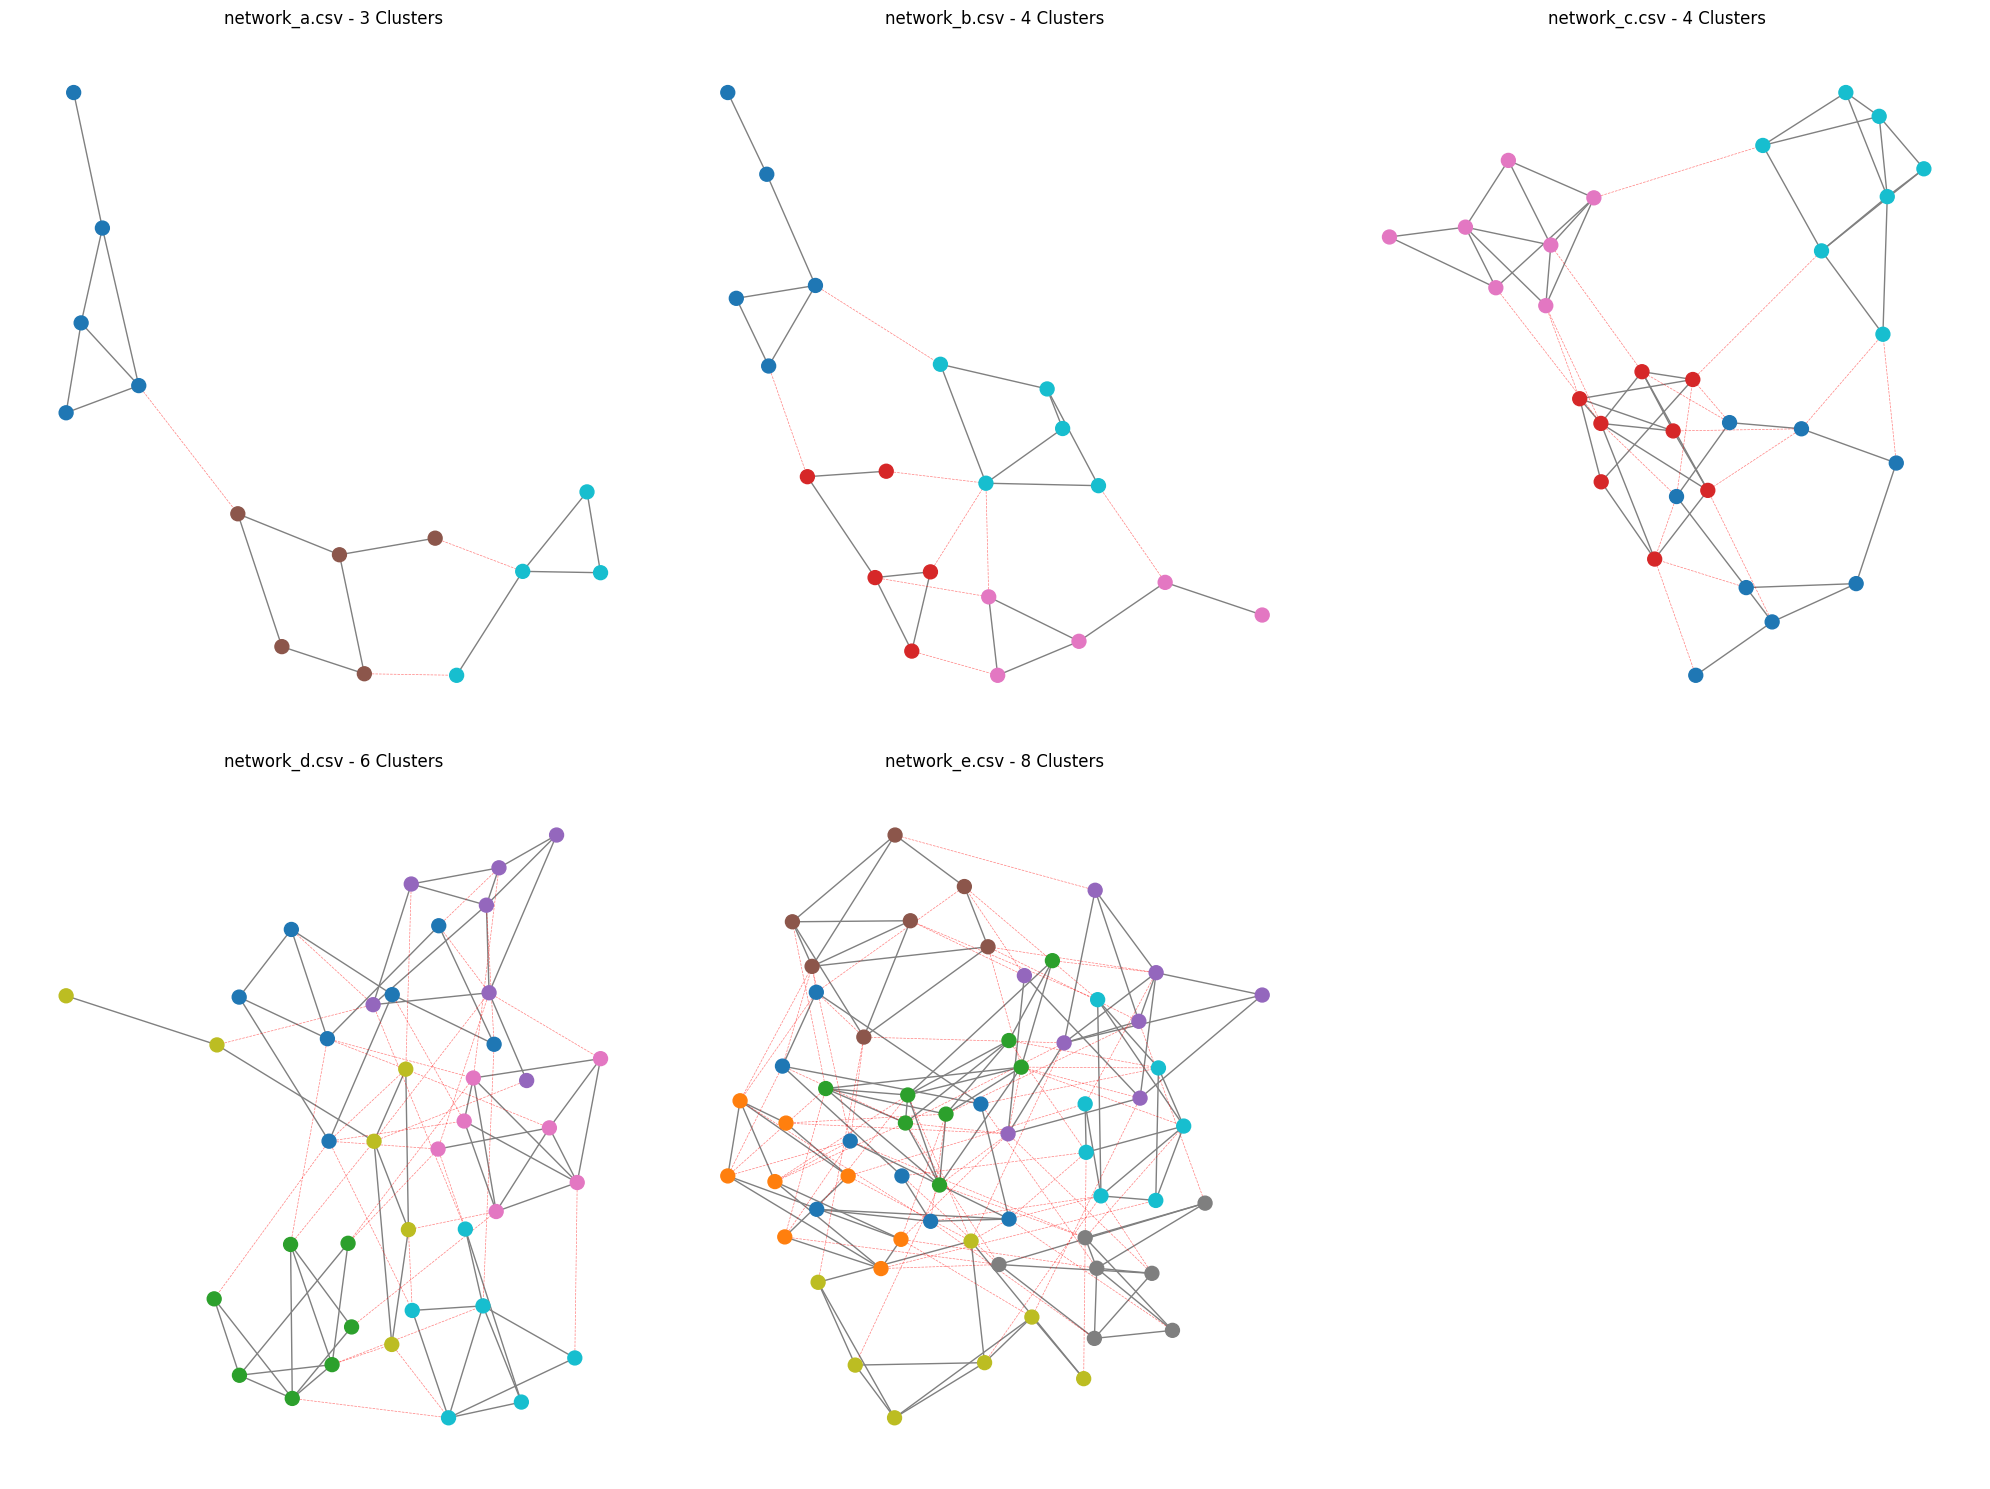

In [4]:
print(f"{'Network':<15} | {'Cluster Sizes (Node Counts)'}")
print("-" * 50)

plt.figure(figsize=(20, 15))

for i, filename in enumerate(network_files):
    full_path = os.path.join(base_path_q3, filename)
    
    result = solve_clusterability(full_path)
    
    if 'error' in result:
        print(f"{filename:<15} | ERROR: {result['error']}")
        continue
        
    # Text Output
    sizes = result['cluster_sizes']
    sizes_str = ", ".join([f"C{k}:{v}" for k, v in sizes.items()])
    print(f"{filename:<15} | {sizes_str}")
    
    # Visualization
    G = result['graph']
    node_colors = result['node_colors']
    
    # Create subplot
    plt.subplot(2, 3, i+1)
    
    # Layout algorithm 
    pos = nx.spring_layout(G, seed=42, k=0.15)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.tab10, node_size=100)
    
    # Draw edges (Solid for positive, Dashed for negative)
    pos_edges = [(u, v) for u, v, d in G.edges(data=True) if d['sign'] == 1]
    neg_edges = [(u, v) for u, v, d in G.edges(data=True) if d['sign'] == -1]
    
    nx.draw_networkx_edges(G, pos, edgelist=pos_edges, edge_color='gray', width=1.0)
    nx.draw_networkx_edges(G, pos, edgelist=neg_edges, edge_color='red', style='dashed', alpha=0.5, width=0.5)
    
    plt.title(f"{filename} - {len(result['clusters'])} Clusters")
    plt.axis('off')

plt.tight_layout()
plt.show()

<div dir="rtl">

در این سوال با شبکه‌هایی مواجه هستیم که دارای ویژگی **توازن ضعیف (Weakly Balanced)** هستند. طبق تعریف، در یک شبکه با توازن ضعیف (Clusterable Network)، می‌توان گره‌ها را به $k$ خوشه تقسیم کرد به‌طوری که:
* تمامی یال‌های **مثبت** درون خوشه‌ها (Within Clusters) قرار گیرند.
* تمامی یال‌های **منفی** بین خوشه‌ها (Between Clusters) قرار گیرند.

**روش شناسایی خوشه‌ها:**
برای شناسایی خوشه‌ها از ویژگی اصلی توازن ضعیف استفاده کردیم. از آنجا که یال‌های مثبت تنها می‌توانند گره‌های یک خوشه واحد را به هم متصل کنند، اگر تمامی یال‌های منفی را نادیده بگیریم و فقط زیرگرافی شامل یال‌های مثبت بسازیم، **مولفه‌های همبند (Connected Components)** این زیرگراف دقیقاً همان خوشه‌های مورد نظر خواهند بود.

بنابراین الگوریتم پیاده‌سازی شده به شرح زیر است:
1.  ایجاد یک گراف جدید که تنها شامل یال‌های با علامت +۱ است.
2.  یافتن مولفه‌های همبند در این گراف.
3.  هر مولفه همبند به عنوان یک Cluster مستقل در نظر گرفته شد.

با اعمال روش فوق بر روی شبکه‌های موجود، نتایج زیر حاصل شد:

| نام شبکه | تعداد خوشه‌ها | توزیع گره‌ها در خوشه‌ها |
| :---: | :---: | :--- |
| `network_a.csv` | ۳ خوشه | خوشه اول: ۵، خوشه دوم: ۵، خوشه سوم: ۴ گره |
| `network_b.csv` | ۴ خوشه | ۴ خوشه با اندازه برابر (هر کدام ۵ گره) |
| `network_c.csv` | ۴ خوشه | دو خوشه ۸ تایی و دو خوشه ۷ تایی |
| `network_d.csv` | ۶ خوشه | چهار خوشه ۷ تایی و دو خوشه ۶ تایی |
| `network_e.csv` | ۸ خوشه | چهار خوشه ۸ تایی و چهار خوشه ۷ تایی |

نمودارهای رسم شده ساختار خوشه‌ای را به وضوح نشان می‌دهند:
* **رنگ گره‌ها:** گره‌های هم‌رنگ متعلق به یک خوشه هستند.
* **یال‌ها:**
    * یال‌های **طوسی/توپر** (مثبت) تنها بین گره‌های هم‌رنگ کشیده شده‌اند.
    * یال‌های **قرمز/چین‌دار** (منفی) تنها بین گره‌های با رنگ‌های متفاوت (بین خوشه‌ها) وجود دارند.

این ساختار بصری تایید می‌کند که تمامی شبکه‌های داده شده خاصیت Clusterability را دارا هستند و الگوریتم به درستی آن‌ها را تفکیک کرده است.

</div>

# **Line Index**

In [14]:
result = solve_line_index(file_path_q4, alpha=0.5, num_clusters=4)

init = result['initial_random']
opt = result['optimized']
    
print("Line Index Analysis")
print(f"{'State':<10} | {'Line Index':<10} | {'P (Pos Between)':<10} | {'N (Neg Within)':<10}")
print("_" * 55)
print(f"{'Random':<10} | {init['LI']:<10.1f} | {init['P']:<15} | {init['N']:<10}")
print(f"{'Optimized':<10} | {opt['LI']:<10.1f} | {opt['P']:<15} | {opt['N']:<10}")
print("_" * 55)
    
improvement = init['LI'] - opt['LI']
print(f"\nOptimization converged in {result['iterations']} iterations.")
print(f"Reduction in Line Index: {improvement}")

Line Index Analysis
State      | Line Index | P (Pos Between) | N (Neg Within)
_______________________________________________________
Random     | 42.5       | 66              | 19        
Optimized  | 7.5        | 4               | 11        
_______________________________________________________

Optimization converged in 3 iterations.
Reduction in Line Index: 35.0


<div dir="rtl">

در این سوال هدف محاسبه **Line Index** برای یک شبکه علامت‌دار با ۴ خوشه است. شاخص خط معیاری است که نشان می‌دهد یک شبکه‌بندی (Clustering) چقدر با ساختار ایده‌آل "توازن ساختاری" فاصله دارد.
فرمول محاسبه به صورت زیر است:
$$\text{Line Index} = \alpha \cdot P + (1 - \alpha) \cdot N$$
که در آن:
* $P$: تعداد یال‌های **مثبت** بین خوشه‌ها (که در حالت ایده‌آل نباید باشند).
* $N$: تعداد یال‌های **منفی** درون خوشه‌ها (که در حالت ایده‌آل نباید باشند).
* $\alpha$: ضریب وزن‌دهی (برابر با $0.5$).

### Methodology

#### الف) خوشه‌بندی تصادفی (Random Clustering)
ابتدا به عنوان نقطه شروع (Baseline)، هر گره به صورت کاملاً تصادفی به یکی از ۴ خوشه ($k=0,1,2,3$) اختصاص داده شد و مقدار Line Index محاسبه گردید. همانطور که انتظار می‌رفت، این مقدار بالا بود زیرا ساختار واقعی شبکه در نظر گرفته نشده بود.

#### ب) الگوریتم ابتکاری (Heuristic Approach)
برای بهبود خوشه‌بندی و کاهش Line Index، از یک الگوریتم **جستجوی محلی حریصانه (Greedy Local Search)** استفاده شد.
**مراحل الگوریتم:**
1.  **شروع:** از خوشه‌بندی تصادفی مرحله قبل شروع می‌کنیم.
2.  **تکرار (Iteration):**
    * برای هر گره در شبکه:
        * هزینه (Cost) حضور آن گره در هر یک از ۴ خوشه محاسبه می‌شود. هزینه بر اساس تعداد یال‌های ناسازگار (مثبت با خوشه‌های دیگر یا منفی درون خوشه) محاسبه می‌گردد.
        * گره به خوشه‌ای منتقل می‌شود که کمترین هزینه (Penalty) را ایجاد کند.
3.  **همگرایی:** این فرآیند تا زمانی که دیگر جابجایی گره‌ها باعث کاهش Line Index نشود، ادامه می‌یابد.


نتایج اجرای کد و مقایسه دو روش در جدول زیر آمده است:

| وضعیت (State) | مقدار Line Index | تعداد P (مثبت بین خوشه‌ها) | تعداد N (منفی درون خوشه‌ها) |
| :---: | :---: | :---: | :---: |
| **تصادفی (Random)** | **42.5** | 66 | 19 |
| **بهینه‌سازی شده (Optimized)** | **7.5** | 4 | 11 |

**مشاهدات:**
* الگوریتم هیوریستیک تنها در **۳ تکرار (Iteration)** همگرا شد که نشان‌دهنده کارایی بالای الگوریتم و وجود ساختار خوشه‌ای مشخص در داده‌هاست.
* مقدار Line Index از **۴۲.۵** به **۷.۵** کاهش یافت (کاهش ۳۵ واحدی).
* تعداد یال‌های مثبت بین خوشه‌ها ($P$) از ۶۶ به ۴ کاهش یافت، که نشان می‌دهد الگوریتم موفق شده است اکثر یال‌های دوستی را به درون خوشه‌ها منتقل کند.

</div>

# **Transitivity**

In [16]:
result = solve_transitivity(file_path_q5)


print("Transitivity Analysis")
print(f"Transitive Triples:      {result['transitive_triples']}")
print(f"Total Possible Triples:  {result['potential_triples']}")
print(f"Transitivity Ratio:      {result['transitivity_ratio']:.4f}")
print("-" * 30)
print(f"Initial Edge Count:      {result['initial_edges']}")
print(f"Edges Added to Closure:  {result['added_count']}")
print(f"Final Total Edges:       {result['final_total_edges']}")
    
print("\nList of Added Edges (First 10 shown):")
print(result['added_edges'][:10])

Transitivity Analysis
Transitive Triples:      70
Total Possible Triples:  3277
Transitivity Ratio:      0.0214
------------------------------
Initial Edge Count:      820
Edges Added to Closure:  37991
Final Total Edges:       38811

List of Added Edges (First 10 shown):
[(13, 88), (167, 146), (32, 101), (86, 72), (177, 190), (16, 93), (130, 115), (96, 122), (33, 182), (147, 167)]


<div dir="rtl">

در این سوال یک شبکه جهت‌دار (Directed Network) داده شده است. مفهوم تراگذری در گراف‌های جهت‌دار به این صورت تعریف می‌شود:
یک سه‌گانه (Triad) شامل گره‌های $(i, j, k)$ را در نظر بگیرید. اگر یال‌های $(i \to j)$ و $(j \to k)$ وجود داشته باشند، تراگذری ایجاب می‌کند که یال $(i \to k)$ نیز وجود داشته باشد.

### Methodology
برای حل این سوال مراحل زیر طی شد:
1.  **بررسی سه‌گانه‌ها:** تمام جفت یال‌های متوالی به فرم $i \to j \to k$ شناسایی شدند (تعداد کل سه‌گانه‌های ممکن).
2.  **شمارش سه‌گانه‌های تراگذر:** برای هر مورد بالا، چک شد که آیا یال مستقیم $i \to k$ وجود دارد یا خیر.
3.  **محاسبه نسبت تراگذری (Transitivity Ratio):**
    $$\text{Ratio} = \frac{\text{تعداد سه‌گانه‌های تراگذر}}{\text{تعداد کل سه‌گانه‌های ممکن } (i \to j \to k)}$$
4.  **بستار تراگذر (Transitive Closure):** برای کامل کردن شبکه، به صورت تکرار‌شونده هر جا که رابطه $i \to j$ و $j \to k$ برقرار بود اما $i \to k$ وجود نداشت، یال $i \to k$ اضافه شد تا شبکه کاملاً تراگذر شود.

نتایج به دست آمده نشان‌دهنده **تراگذری بسیار پایین** در شبکه اولیه است:

| معیار | مقدار |
| :--- | :--- |
| تعداد سه‌گانه‌های تراگذر (Transitive Triples) | ۷۰ |
| تعداد کل سه‌گانه‌های ممکن (Potential Triples) | ۳,۲۷۷ |
| **نسبت تراگذری (Transitivity Ratio)** | **۰.۰۲۱۴** |

این نسبت پایین (حدود ۲٪) نشان می‌دهد که در شبکه اولیه، به‌ندرت پیش می‌آید که ارتباطات به صورت مثلثی بسته شوند.

### Transitive Closure
برای تبدیل این شبکه به یک شبکه کاملاً تراگذر، نیاز به اضافه کردن تعداد زیادی یال بود:

* **تعداد یال‌های اولیه:** ۸۲۰
* **تعداد یال‌های اضافه شده:** ۳۷,۹۹۱
* **تعداد یال‌های نهایی:** ۳۸,۸۱۱

افزایش حدود ۴۶ برابری تعداد یال‌ها نشان می‌دهد که شبکه اولیه احتمالاً شامل زنجیره‌های طولانی (مانند $A \to B \to C \to D \dots$) بوده است که در حالت تراگذر، باید تمام گره‌های ابتدایی به تمام گره‌های انتهایی زنجیره متصل شوند.

### ۵. نمونه‌ای از یال‌های اضافه شده
برخی از ۳۷,۹۹۱ یال اضافه شده عبارتند از:
* (13, 88)
* (167, 146)
* (32, 101)
* (86, 72)
* (177, 190)
* (16, 93)
* (130, 115)
* (96, 122)
* (33, 182)
* (147, 167)

</div>